In [29]:
import copy

import matplotlib as mpl
import matplotlib.pyplot as plt  # For plotting results; optional
import numpy as np
from landlab import RasterModelGrid, imshow_grid, imshowhs_grid
from landlab.components import FlowAccumulator, GravelBedrockEroder
from landlab.io.esri_ascii import write_esri_ascii

import pickle

In [30]:
with open('post-slide_fakelandscape.pickle', 'rb') as g:
    mg = pickle.load(g)

### plot input landscape

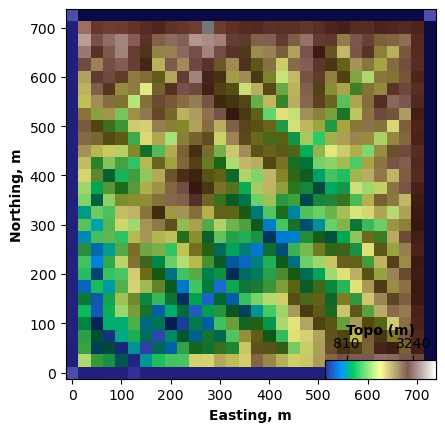

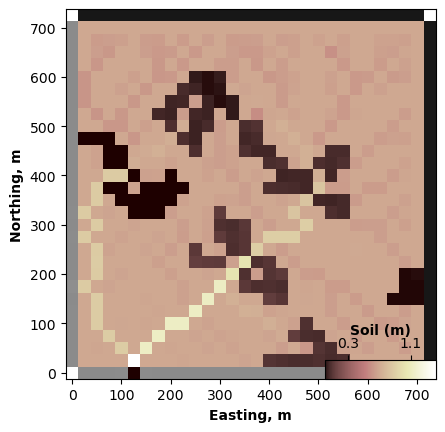

In [31]:
cmap = copy.copy(mpl.colormaps["terrain"])
# Show DEM draped over the shaded topographic relief
imshowhs_grid(
    mg,
    "topographic__elevation",
    var_name="Topo",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)
plt.show()
# Show Soil thickness draped over the shaded topographic relief
cmap = copy.copy(mpl.colormaps["pink"])
imshowhs_grid(
    mg,
    "topographic__elevation",
    drape1=mg.at_node["soil__depth"],
    plot_type="Drape1",
    var_name="Soil",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)

z_before_LS = np.array(mg["node"]["topographic__elevation"])

In [32]:
# Open all model boundary edges
# mg.set_closed_boundaries_at_grid_edges(
#     bottom_is_closed=True,
#     left_is_closed=True,
#     right_is_closed=True,
#     top_is_closed=True,
# )
# mg.status_at_node[5] = 1 

elev = mg.at_node["topographic__elevation"]

fa = FlowAccumulator(mg, runoff_rate=10.0)
fa.run_one_step()
eroder = GravelBedrockEroder(mg, abrasion_coefficient=0.0005)
rock_elev = mg.at_node["bedrock__elevation"]

for _ in range(20):
    rock_elev[mg.core_nodes] += 0.001
    elev[mg.core_nodes] += 0.001
    fa.run_one_step()
    eroder.run_one_step(10.0)

int(elev[4] * 100)

FlowAccumulator found both the field 'water__unit_flux_in' and a provided float or array for the runoff_rate argument. THE FIELD IS BEING OVERWRITTEN WITH THE SUPPLIED RUNOFF_RATE!


0

In [33]:
mg.fields()

{'at_link:flow__link_direction',
 'at_node:LS_sediment__flux',
 'at_node:bedload_sediment__rate_of_loss_to_abrasion',
 'at_node:bedload_sediment__volume_influx',
 'at_node:bedload_sediment__volume_outflux',
 'at_node:bedrock__abrasion_rate',
 'at_node:bedrock__elevation',
 'at_node:bedrock__exposure_fraction',
 'at_node:bedrock__lowering_rate',
 'at_node:bedrock__plucking_rate',
 'at_node:depression_free_elevation',
 'at_node:drainage_area',
 'at_node:flood_status_code',
 'at_node:flow__data_structure_delta',
 'at_node:flow__link_to_receiver_node',
 'at_node:flow__receiver_node',
 'at_node:flow__receiver_proportions',
 'at_node:flow__sink_flag',
 'at_node:flow__upstream_node_order',
 'at_node:hill_flow__receiver_node',
 'at_node:hill_flow__receiver_proportions',
 'at_node:hill_flow__upstream_node_order',
 'at_node:hill_topographic__steepest_slope',
 'at_node:landslide__deposition',
 'at_node:landslide__erosion',
 'at_node:landslide_sediment_point_source',
 'at_node:sediment__flux',
 'a

<Axes: xlabel='Easting', ylabel='Northing'>

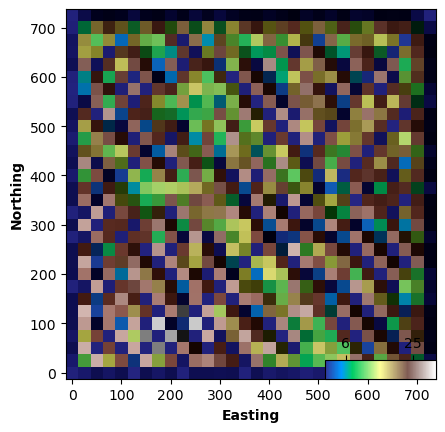

In [34]:
imshowhs_grid(mg, mg.at_node["topographic__steepest_slope"], cmap="terrain")

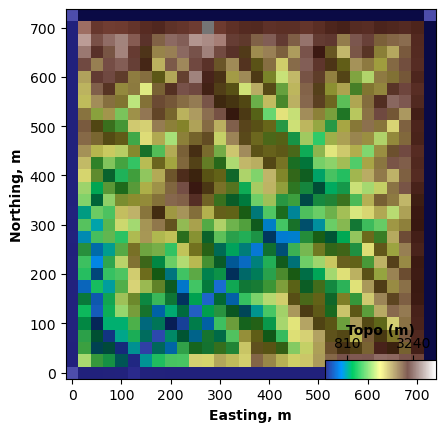

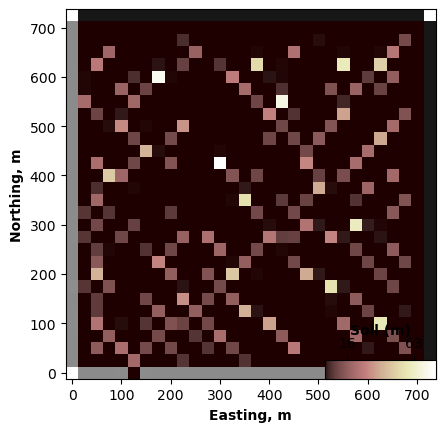

In [35]:
cmap = copy.copy(mpl.colormaps["terrain"])
# Show DEM draped over the shaded topographic relief
imshowhs_grid(
    mg,
    "topographic__elevation",
    var_name="Topo",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)
plt.show()
# Show Soil thickness draped over the shaded topographic relief
cmap = copy.copy(mpl.colormaps["pink"])
imshowhs_grid(
    mg,
    "topographic__elevation",
    drape1=mg.at_node["soil__depth"],
    plot_type="Drape1",
    var_name="Soil",
    var_units=r"m",
    grid_units=("m", "m"),
    cmap=cmap,
    ticks_km=False,
)

z_before_LS = np.array(mg["node"]["topographic__elevation"])